### 1. Demonstration on how to read a given section of the Gray data with the session class

The session class is part of the GDa (Gray Data Analysis) package, and it is used to read and save the session info of the gray data in python format for further processing such as the pair-wise coherence computation using another class called 'spectral_analysis' (discussed below in item 2).

It can be imported as:

In [1]:
%matplotlib inline
from GDa.session import session

To instantiate a LFP class you have to call the constructor method and give the necessary parameters (go to the source code for further details):

In [2]:
ses = session(raw_path = 'GrayLab/', monkey = 'lucy', stype = 'samplecor', date = '150128', 
              session = 1, evt_dt = [-0.65,3.00])

It is possible to check the directories where the date will be read from, and where the results will be stored with the following commands:

In [3]:
print('It you read the data from: ' + ses.dir)     
print('It you save the data in:   ' + ses.dir_out)

It you read the data from: GrayLab/lucy/150128/session01
It you save the data in:   Results/lucy/150128/session01


To read the trial, and recording informations can be read with the method __read_session_info__:

In [4]:
ses.read_session_info()

You can print some of those informations using the method __print_info__:

In [5]:
ses.print_info()


-------------------+-----------
Number of channels | 56
-------------------+-----------
Number of trials   | 1006.0
-------------------+-----------
Sample frequency   | 1000 Hz
-------------------+-----------


You can check other informations contained in those dictionaries by calling the method __keys__. To check a specif info you only have to access those dicitionaries using the respective key.

Next, we should be able to read the LFP data using the method __read_lfp_data()__:

In [6]:
ses.read_lfp_data()

Reading data...


The data can then be acessed by calling the __data__ atribute:

In [7]:
print('Printing a portion of the data ')
print('------------------------------------------------------------------')
print(ses.data[:5,0,:5])
print('Printing the data shape')
print('------------------------------------------------------------------')
print('Size = ' + str(ses.data.shape))

Printing a portion of the data 
------------------------------------------------------------------
[[-1.96358590e-05 -3.32542587e-05 -3.89901593e-05 -4.06701777e-05
  -4.30660246e-05]
 [ 1.48573270e-05  1.50673456e-05  1.18835277e-05  9.48347847e-06
   1.01710536e-05]
 [-4.03398101e-05 -3.50792548e-05 -3.13664967e-05 -2.53359149e-05
  -1.68239268e-05]
 [-3.26558127e-05 -3.02250686e-05 -3.28385458e-05 -3.40755482e-05
  -2.91601949e-05]
 [-4.15397203e-05 -4.61350183e-05 -4.65830583e-05 -4.51145810e-05
  -4.32743595e-05]]
Printing the data shape
------------------------------------------------------------------
Size = (540, 49, 3651)


Since only trials where the monkey looked to the correct image at the match period, and we are excluding trials that do not contain slvr and msmod the number of trials has gone from 1006 to 540, and the number of channels from 56 to 49. To plot a sample of LFPs use the methods ___plot__ _ __lfp__ _ __samples__ from the plot_data module:

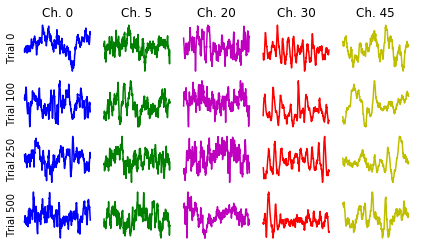

In [8]:
from GDa.plot_data import plot_lfp_samples

trials   = [0, 100, 250, 500]
channels = [0, 5, 20, 30, 45] 
colors   = ['b', 'g', 'm', 'r', 'y']

plot_lfp_samples(ses.data, trials, channels, colors = colors)

To save the data in numpy format (.npy) we use the function __save_npy__. The data will be saved in the __'raw_lfp/'__ directory.

In [ ]:
ses.save_npy()

The file saved in the cell above is a dictionary with two keys: 'data', and 'info'. The first one contains the LFP data, the second is a dictionary itself with the informations listed below: 

1. nC : Number of channels saved (not necessarily the total number of channels in the data);
2. nP : The total number of channel pairs.
3. nT : The total number of trials used.
4. pairs : A matrix $nP\times 2$, with the index of channels that form each pair.
5. indt : The number of each trial saved.
6. fsample : Frequency sample of the LFP signal.
7. tarray : Array containing the time axis (in our example it goes from -0.65 to 3.0).
8. channels_labels : Array containing the original channels labels.
9. dcue : Array containing the time interval between sample on, and sample off for each trial.
10. dsm  : Array containing the time interval between sample on, and match on for each trial.
11. stim : Stimulus label for each of the trials used.
12. indch: Index of the channels used.
13. areas: The name of the area of each channel.
14. t_cue_on: The time at which cue was turned on.
15. t_cue_off: The time at which cue was turned off.
14. t_match_on: The time at which match was turned on.

The file can be loaded as bellow:

In [ ]:
import numpy as np
ses_dic = np.load('raw_lfp/lucy_session01_150128.npy', allow_pickle=True).item()

In [ ]:
print('Printing dictionary keys')
print('------------------------------------------------------------------')
print('Keys: ' + str(ses_dic.keys()))